In [5]:
import os
import pandas as pd
import numpy as np

# Define the base directory
notebook_dir = os.getcwd()
base_dir = os.path.join(notebook_dir, 'Hourly Energy Consumption')

# Define utilities with file names
utilities = {
    'AEP': 'AEP_hourly.csv',
    'COMED': 'COMED_hourly.csv',
    'DAYTON': 'DAYTON_hourly.csv',
    'DEOK': 'DEOK_hourly.csv',
    'DOM': 'DOM_hourly.csv',
    'DUQ': 'DUQ_hourly.csv',
    'EKPC': 'EKPC_hourly.csv',
    'FE': 'FE_hourly.csv',
    'NI': 'Ni_hourly.csv',
    'PJMW': 'PJMW_hourly.csv'
}

# Function to remove outliers
def remove_outliers(series, threshold=3):
    mean = series.mean()
    std = series.std()
    return series[(series > mean - threshold * std) & (series < mean + threshold * std)]

# Function to handle duplicate timestamps
def handle_duplicates(df, mw_col):
    # Group by index and aggregate using mean
    df = df.groupby(df.index).mean()
    return df

# Preprocess function that loads data, handles outliers, duplicates, and adds time-based features
def preprocess_data(file_path, mw_col):
    df = pd.read_csv(file_path)
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)

    # Handle duplicates
    df = handle_duplicates(df, mw_col=mw_col)

    # Remove outliers
    df[mw_col] = remove_outliers(df[mw_col])

    # Drop any remaining missing values
    df.dropna(inplace=True)

    # Add time-based features: hour, day_of_week, and month
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year

    return df

# Go over all utilities and preprocess the data
processed_data = {}
for utility, filename in utilities.items():
    file_path = os.path.join(base_dir, filename)
    df = preprocess_data(file_path, mw_col=f'{utility}_MW')
    processed_data[utility] = df

# print data preprocessing to confirm it was done for all utilities
for utility, df in processed_data.items():
    print(f"Preprocessed data for {utility}:")
    print(df.head())

Preprocessed data for AEP:
                      AEP_MW  hour  day_of_week  month  year
Datetime                                                    
2004-10-01 01:00:00  12379.0     1            4     10  2004
2004-10-01 02:00:00  11935.0     2            4     10  2004
2004-10-01 03:00:00  11692.0     3            4     10  2004
2004-10-01 04:00:00  11597.0     4            4     10  2004
2004-10-01 05:00:00  11681.0     5            4     10  2004
Preprocessed data for COMED:
                     COMED_MW  hour  day_of_week  month  year
Datetime                                                     
2011-01-01 01:00:00    9631.0     1            5      1  2011
2011-01-01 02:00:00    9273.0     2            5      1  2011
2011-01-01 03:00:00    9011.0     3            5      1  2011
2011-01-01 04:00:00    8741.0     4            5      1  2011
2011-01-01 05:00:00    8694.0     5            5      1  2011
Preprocessed data for DAYTON:
                     DAYTON_MW  hour  day_of_week  mo

Root Mean Squared Error (RMSE) for AEP (Linear Regression Model): 2184.3967984739206


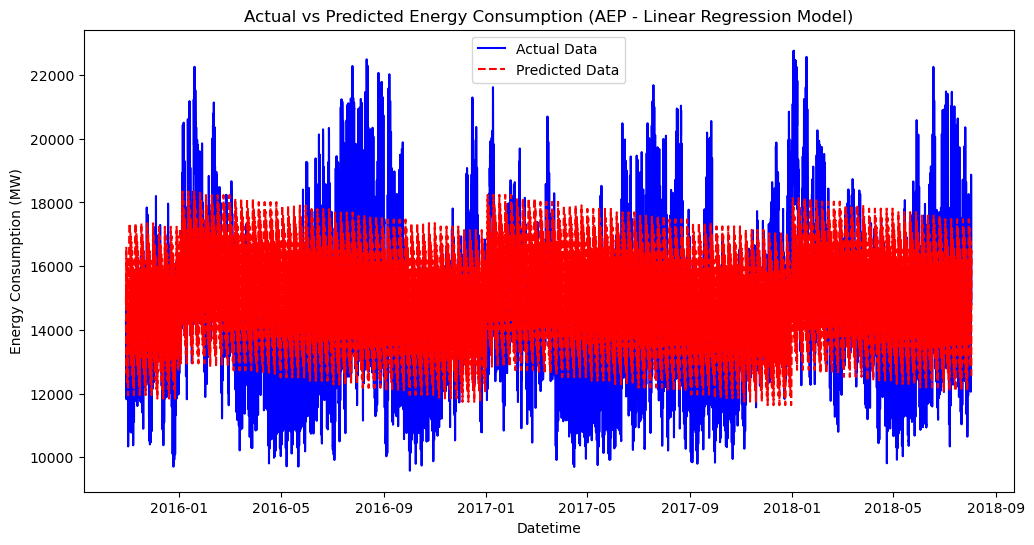

Root Mean Squared Error (RMSE) for COMED (Linear Regression Model): 1811.3419622582528


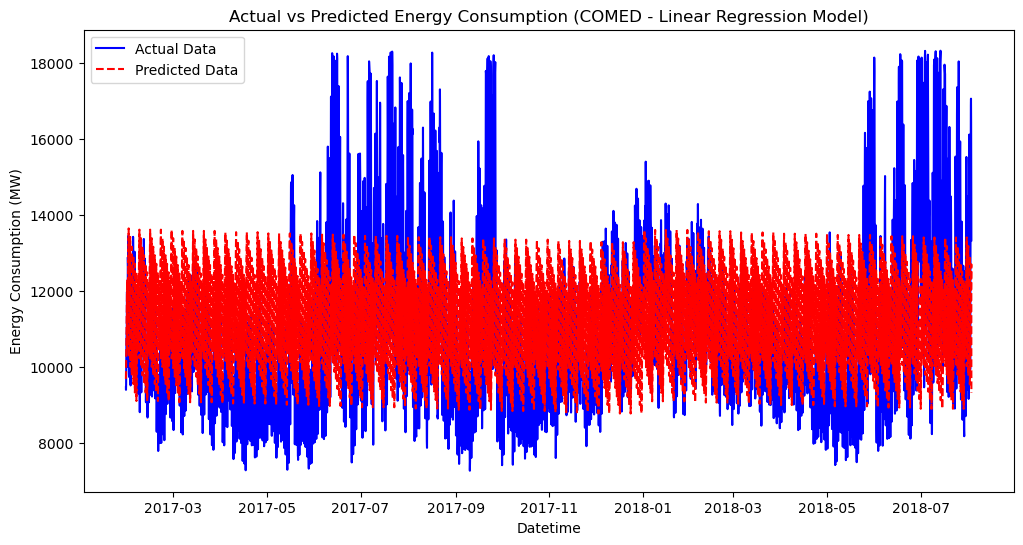

Root Mean Squared Error (RMSE) for DAYTON (Linear Regression Model): 325.7116512025046


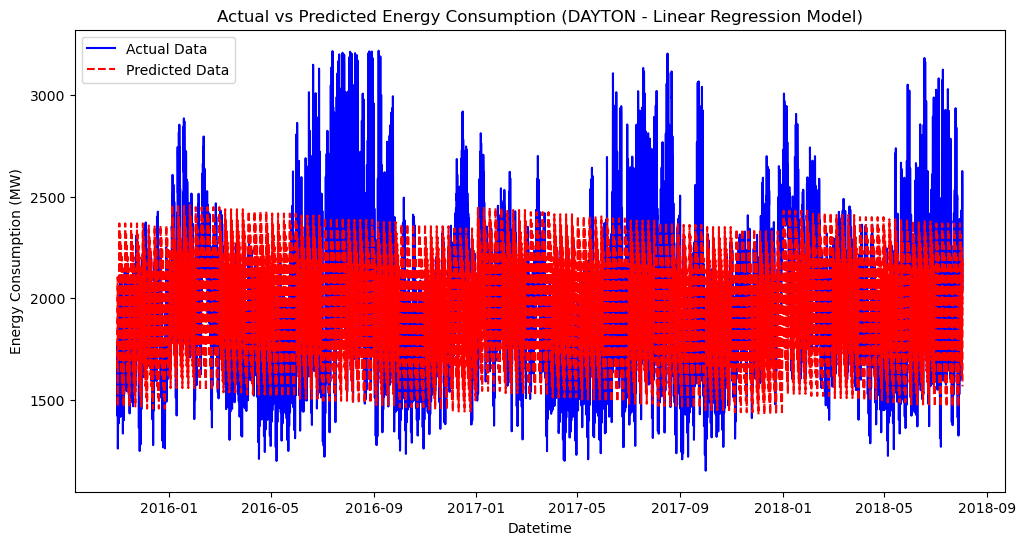

Root Mean Squared Error (RMSE) for DEOK (Linear Regression Model): 527.8255803069185


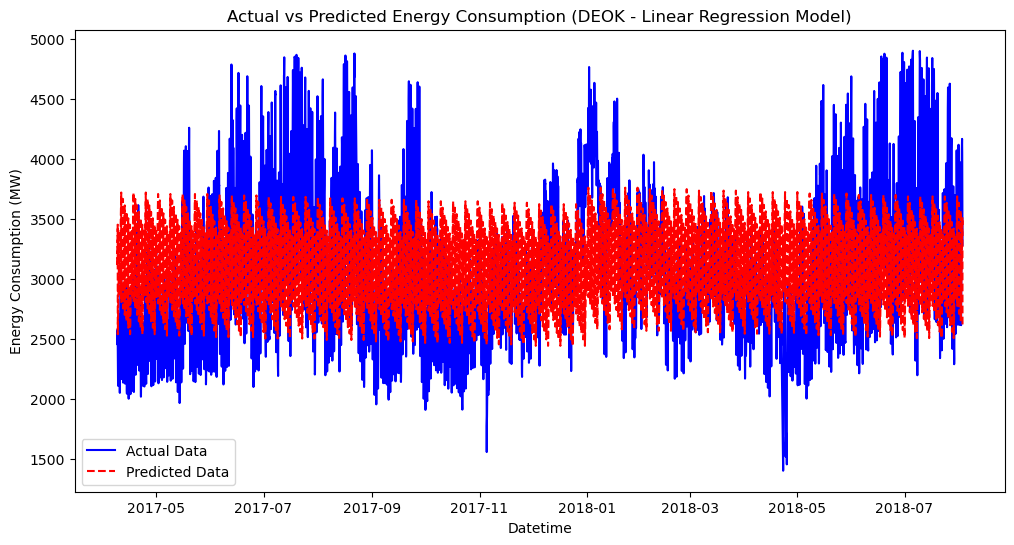

Root Mean Squared Error (RMSE) for DOM (Linear Regression Model): 2162.120717210947


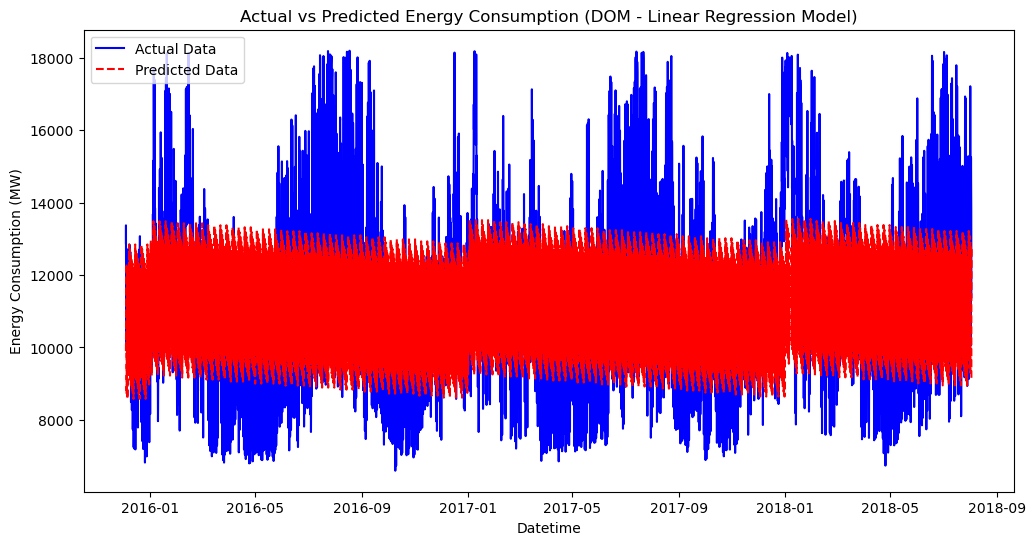

Root Mean Squared Error (RMSE) for DUQ (Linear Regression Model): 269.11468423773


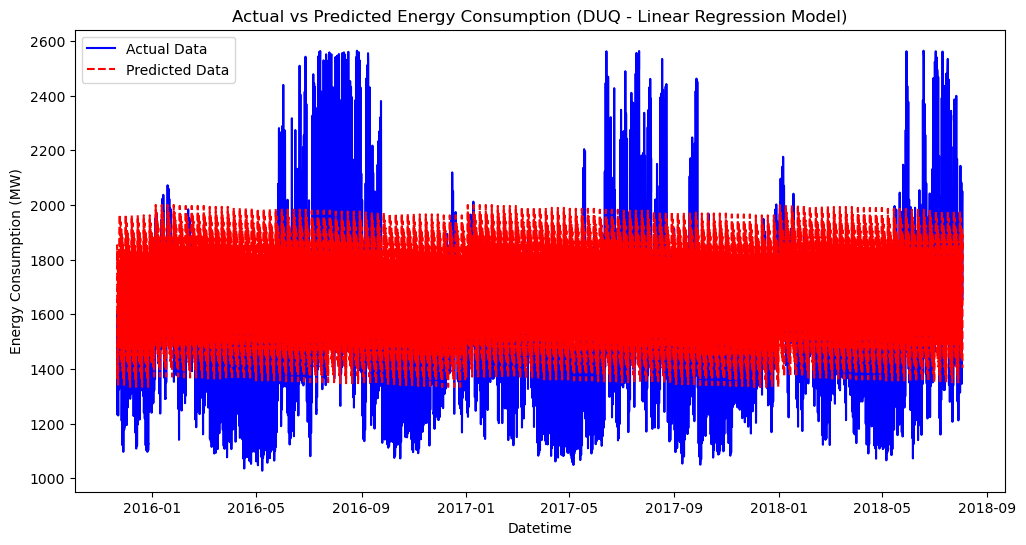

Root Mean Squared Error (RMSE) for EKPC (Linear Regression Model): 338.52200023135015


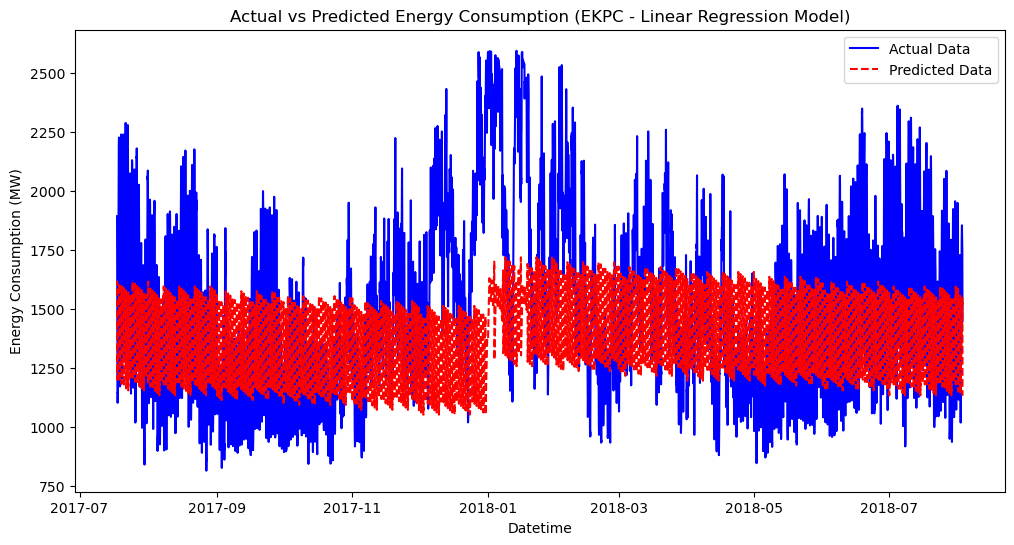

Root Mean Squared Error (RMSE) for FE (Linear Regression Model): 1084.1123839095765


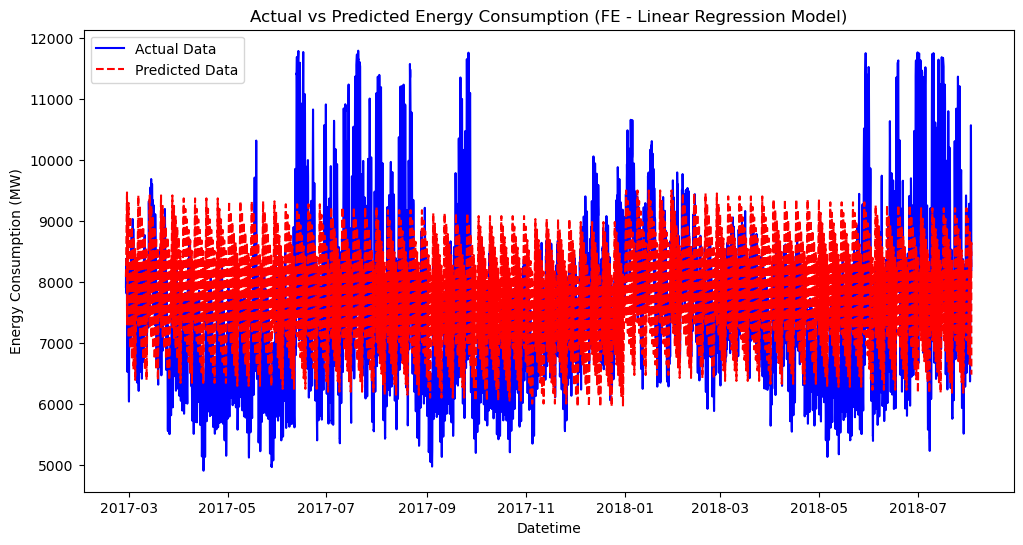

Root Mean Squared Error (RMSE) for NI (Linear Regression Model): 1876.7212217056522


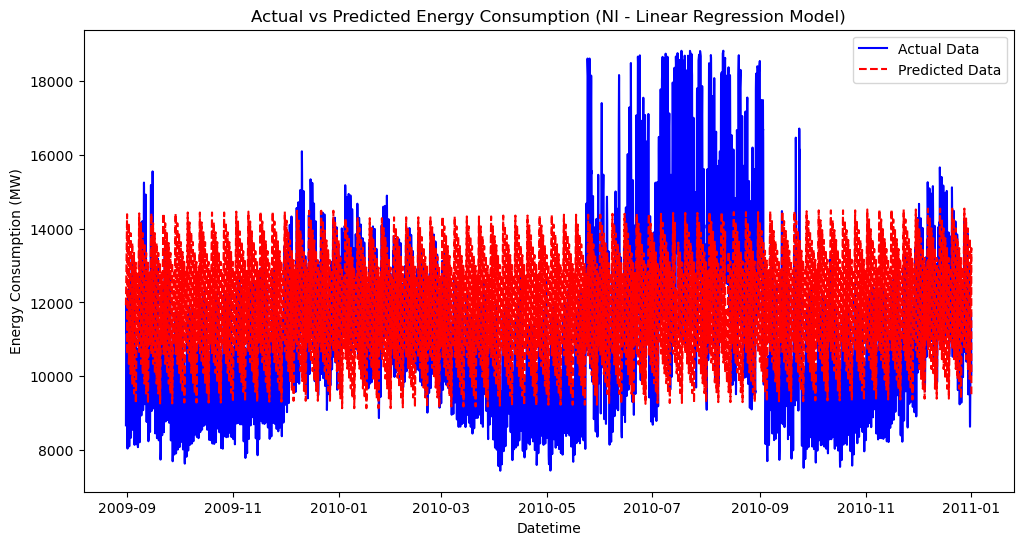

Root Mean Squared Error (RMSE) for PJMW (Linear Regression Model): 857.9039359530798


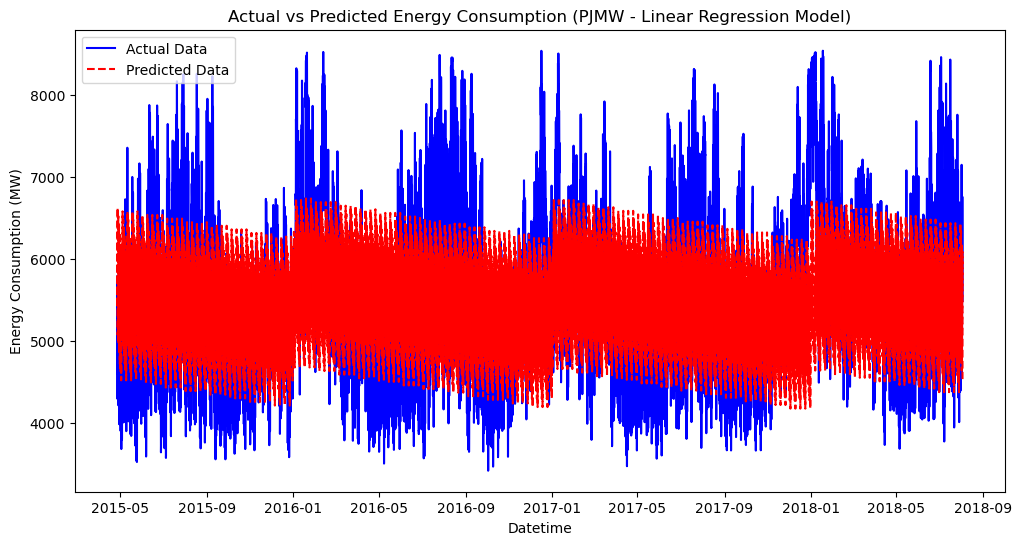

In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Testing and evaluating the Linear Regression model
for utility, df in processed_data.items():
    target = f'{utility}_MW'
    features = ['hour', 'day_of_week', 'month', 'year']  # Features for the model
    X = df[features]
    y = df[target]

    df = df.dropna()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Training the Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Making predictions
    y_pred = lr.predict(X_test)

    # Evaluate the model using RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error (RMSE) for {utility} (Linear Regression Model): {rmse}")

    # Visualize Results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Data', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Energy Consumption ({utility} - Linear Regression Model)')
    plt.xlabel('Datetime')
    plt.ylabel('Energy Consumption (MW)')
    plt.legend()
    plt.show()

    # Coefficients of the Linear Regression model
    #coefficients = lr.coef_
    #feature_importance = dict(zip(features, coefficients))
    #plt.bar(feature_importance.keys(), feature_importance.values(), color='green')
    #plt.title(f'Feature Coefficients ({utility} - Linear Regression Model)')
    #plt.xticks(rotation=45)
    #plt.show()

RMSE: 2098.8405370892497


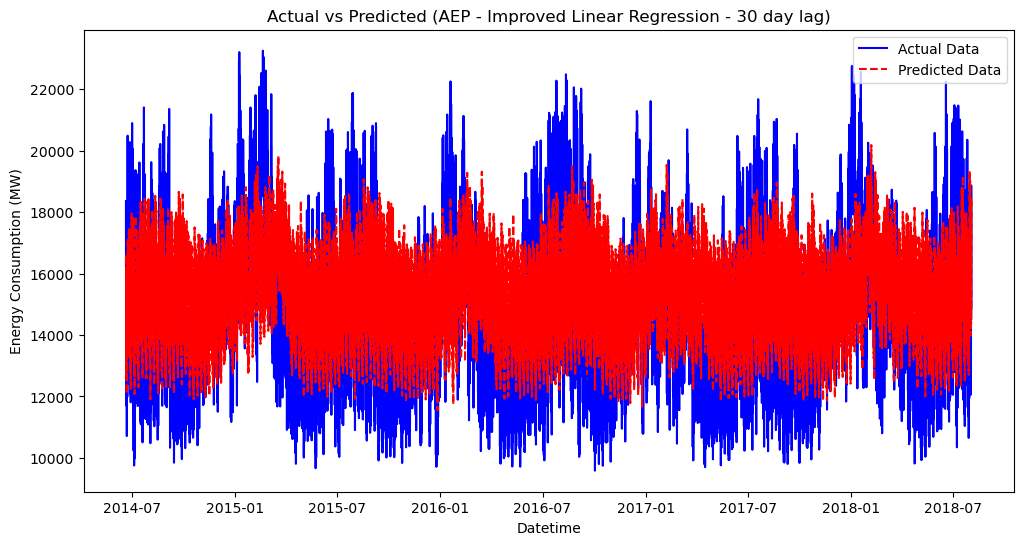

RMSE: 1856.365658009884


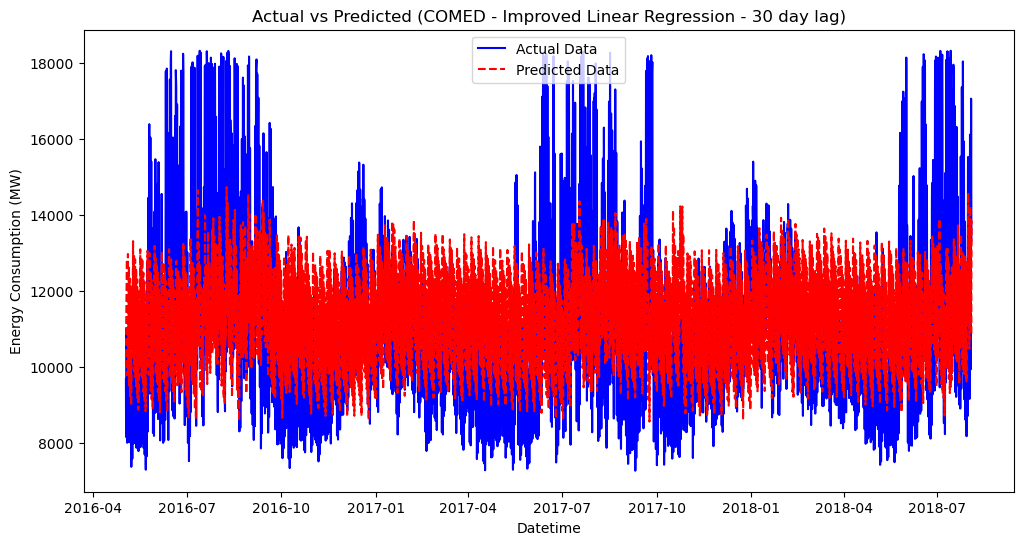

RMSE: 301.75037319707945


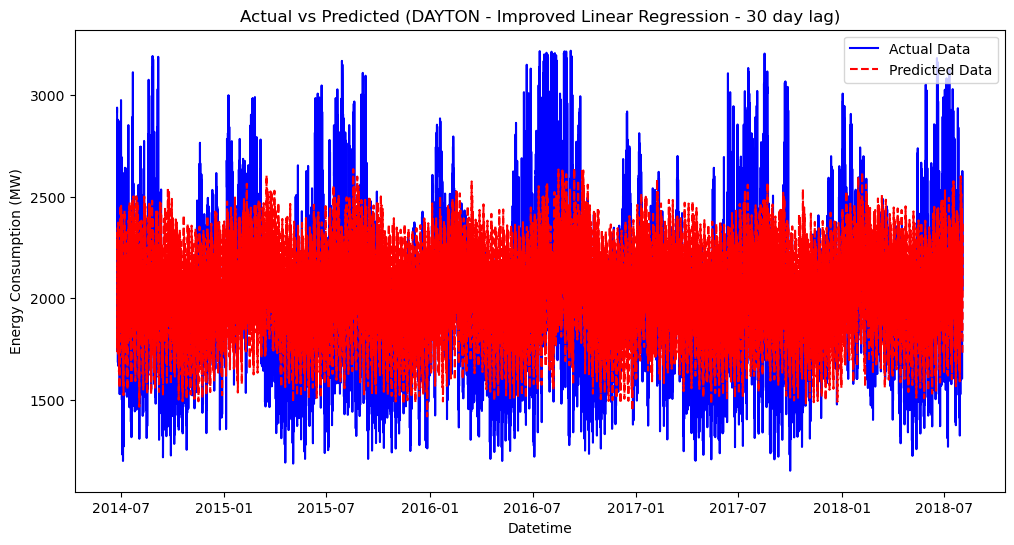

RMSE: 495.5477688069759


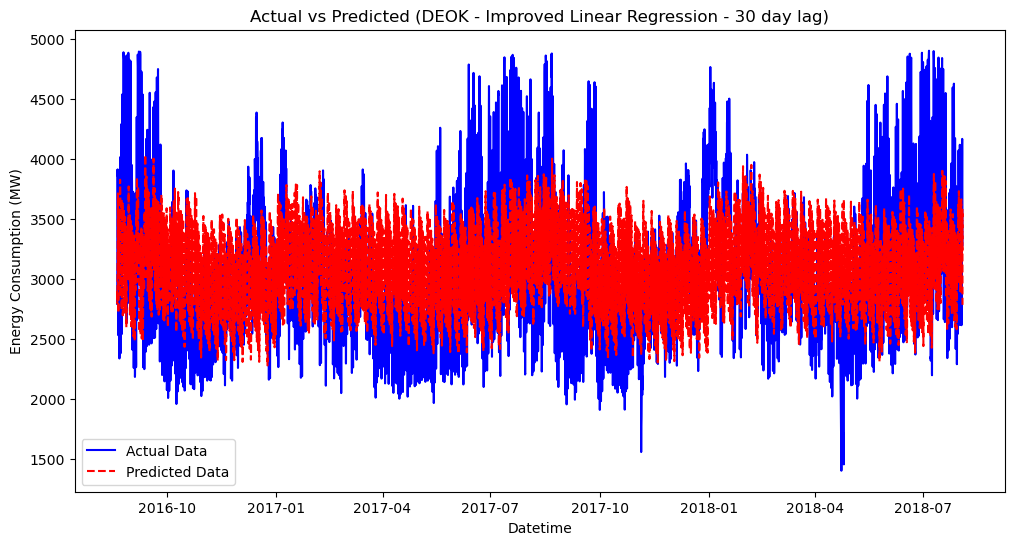

RMSE: 2112.6840091263794


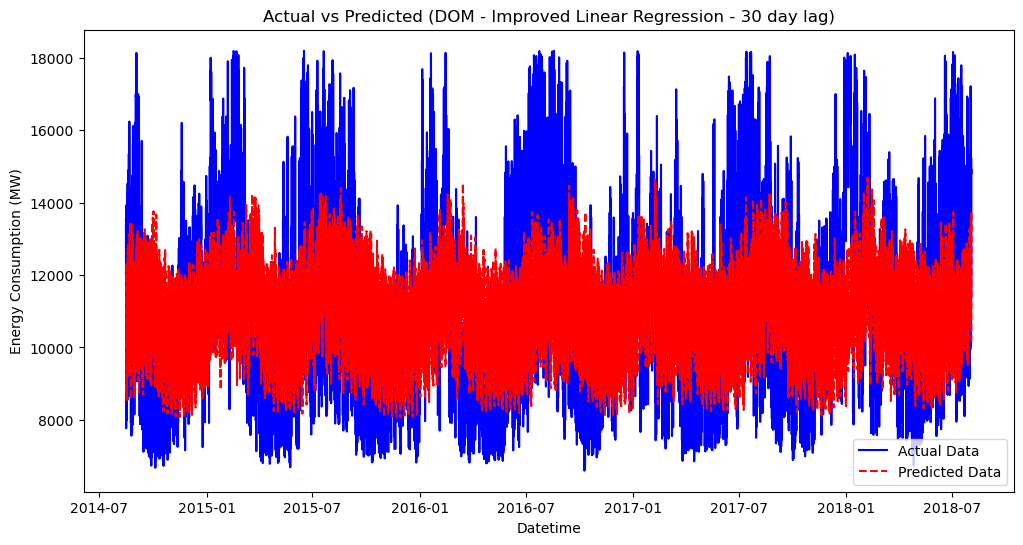

RMSE: 253.45455005038318


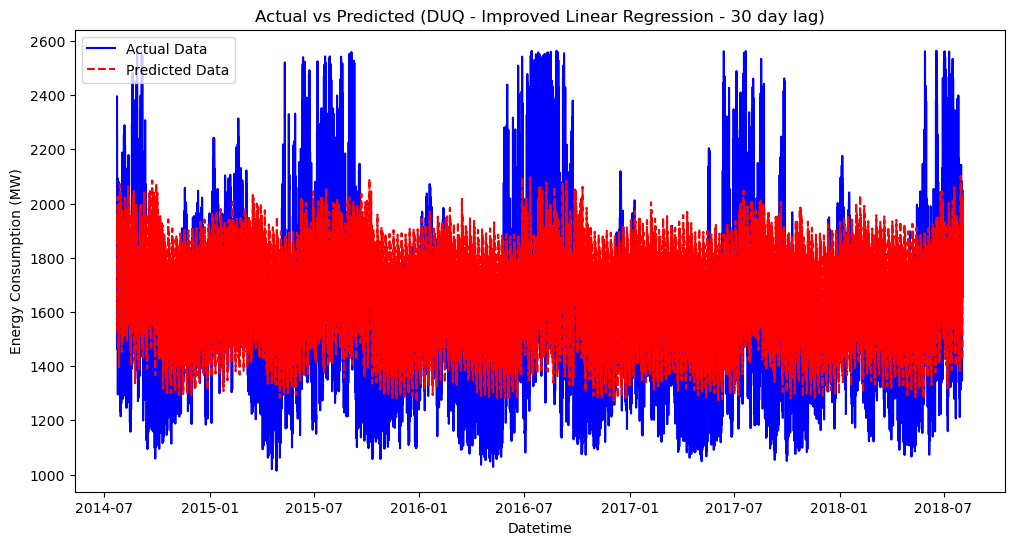

RMSE: 295.5318362104704


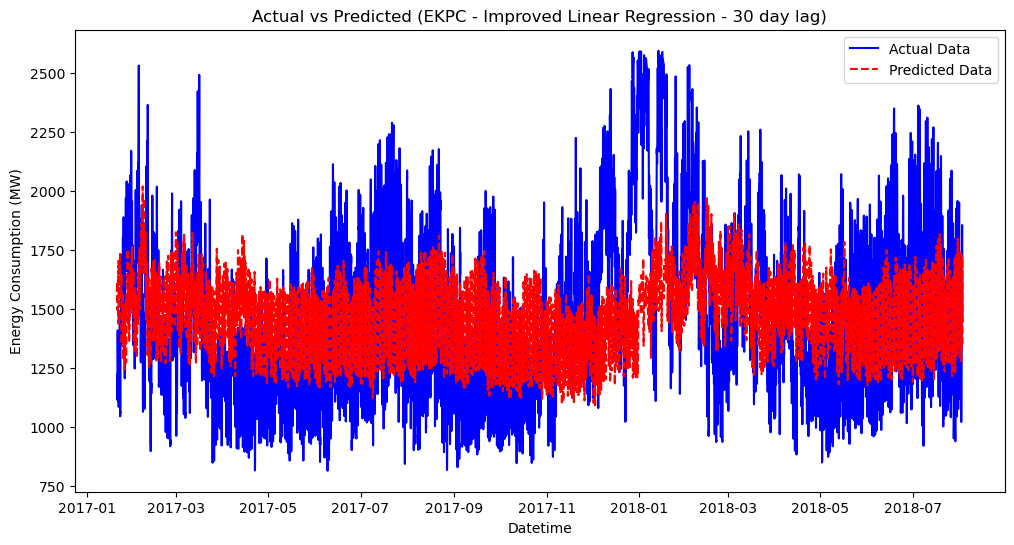

RMSE: 1098.7433623566985


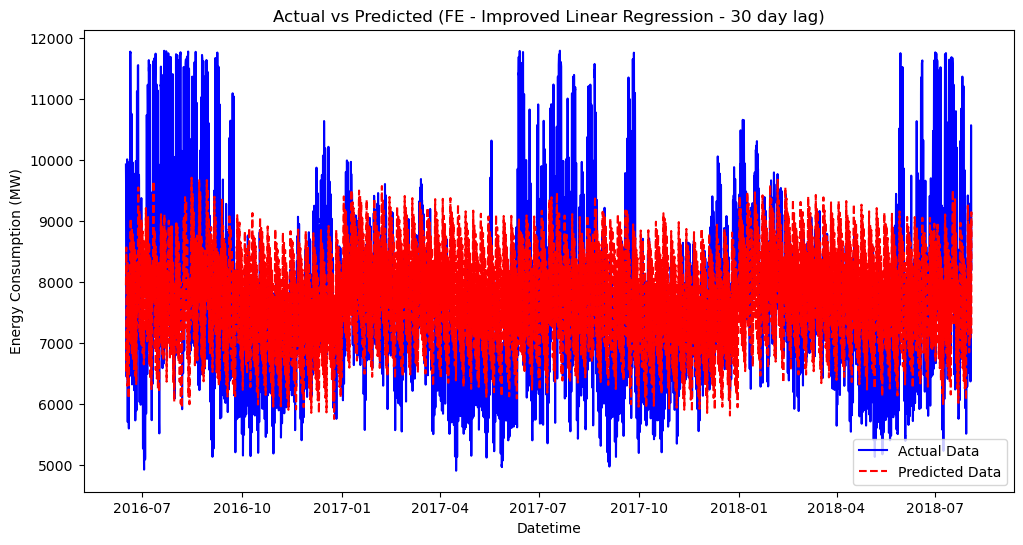

RMSE: 1756.2805997724413


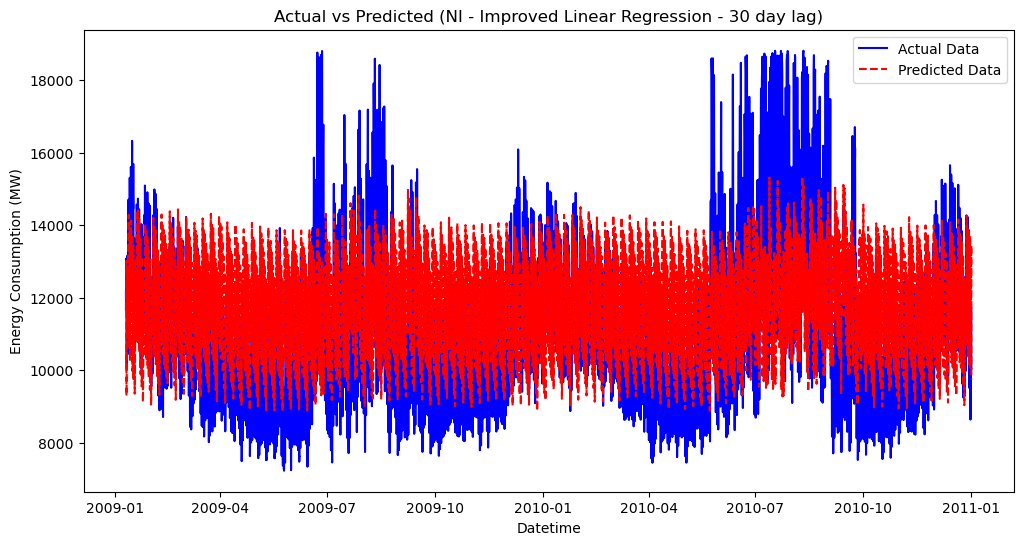

RMSE: 822.7501908297971


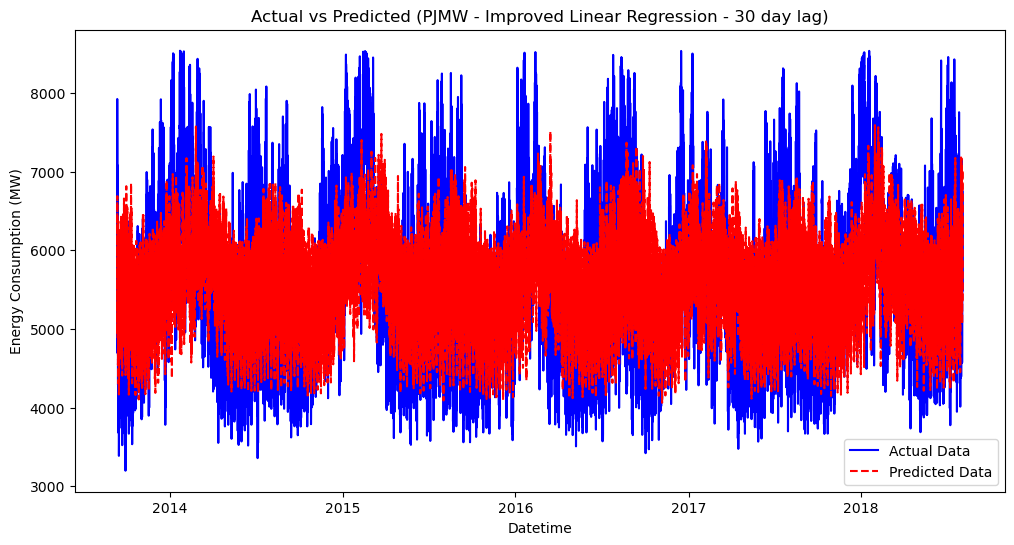

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Add lag features and cyclical encoding
for utility, df in processed_data.items():
    target = f'{utility}_MW'
    df['lag_month'] = df[target].shift(720)


    # Drop rows with NaN due to lag/rolling features
    df = df.dropna()

    # New feature set
    features = ['hour', 'day_of_week', 'month', 'lag_month']
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=False)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Evaluate predictions
    y_pred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Data', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted ({utility} - Improved Linear Regression - 30 day lag)')
    plt.xlabel('Datetime')
    plt.ylabel('Energy Consumption (MW)')
    plt.legend()
    plt.show()
    


RMSE: 1720.0928752483283


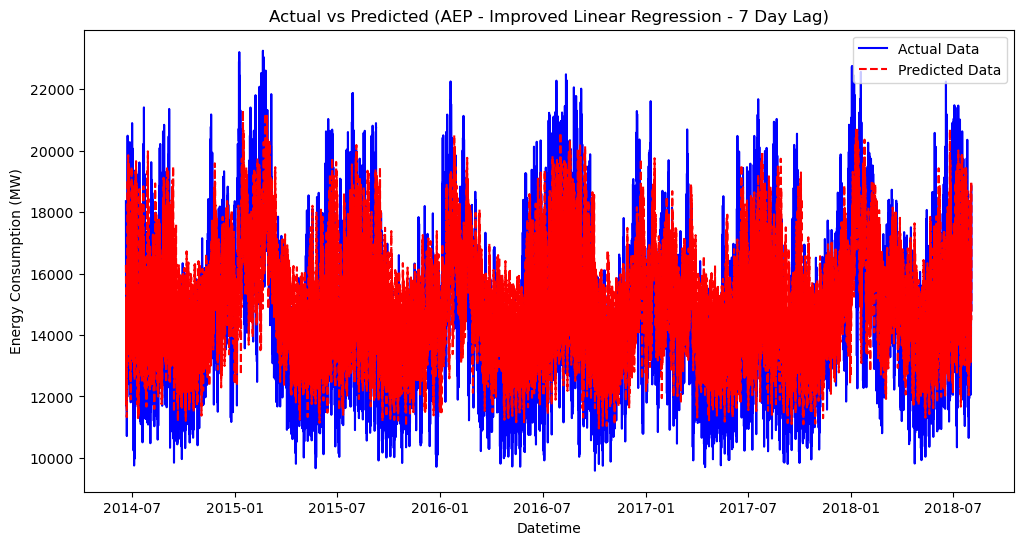

RMSE: 1667.7463457889576


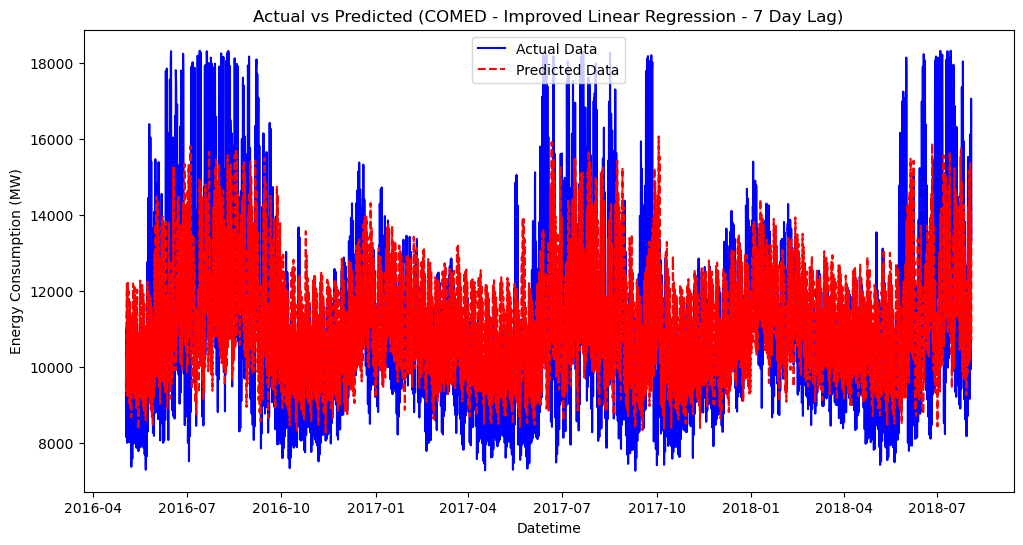

RMSE: 261.6464267562567


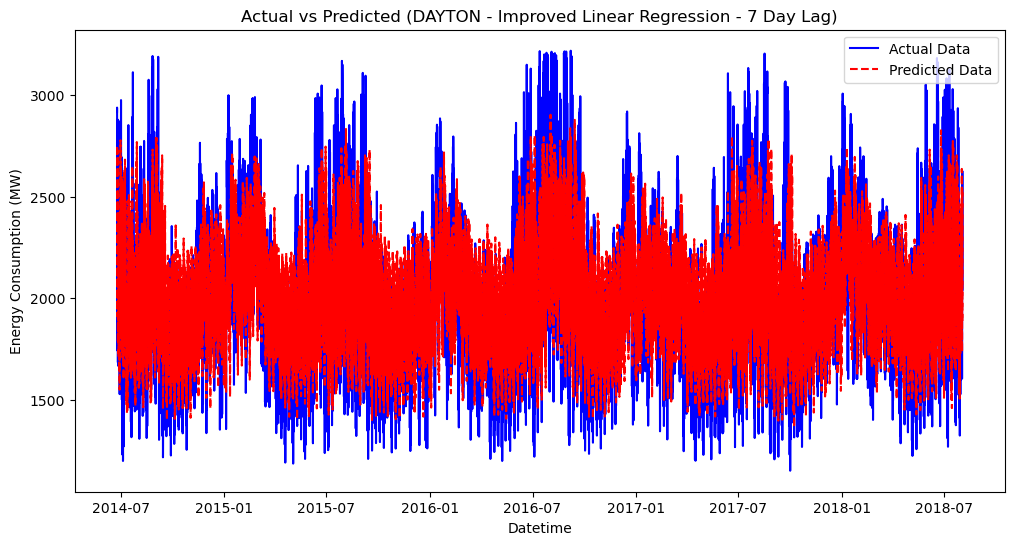

RMSE: 443.2679782860995


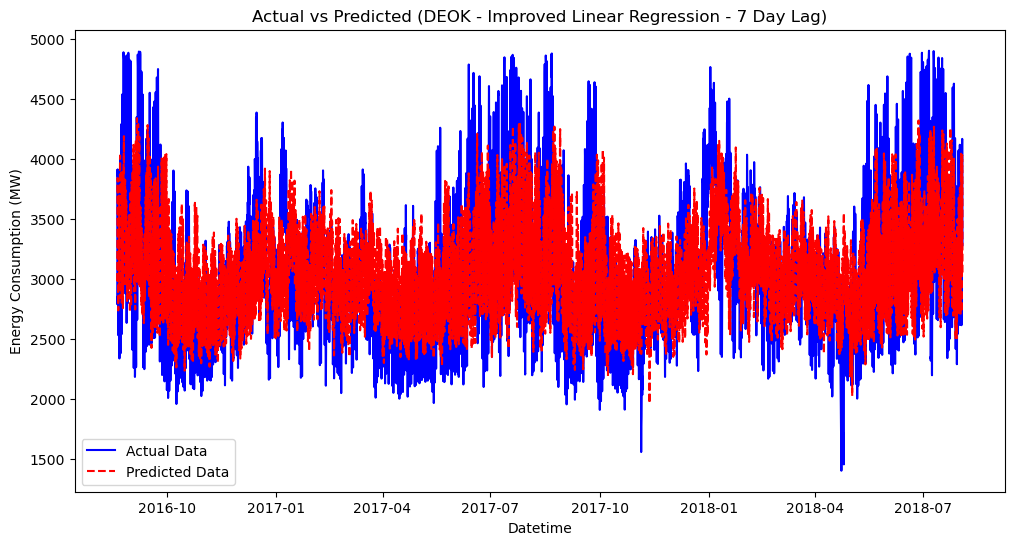

RMSE: 1826.469192998485


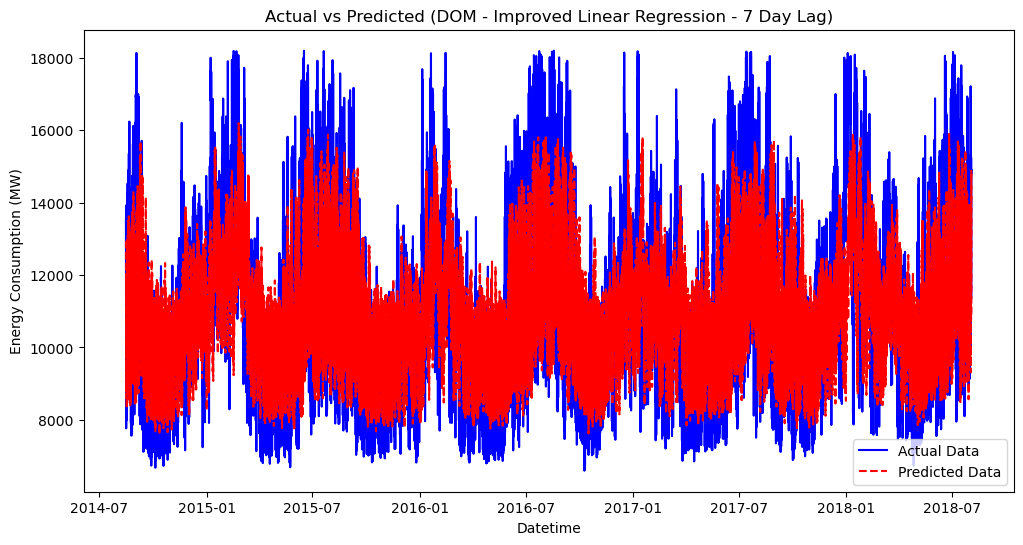

RMSE: 217.71631145910115


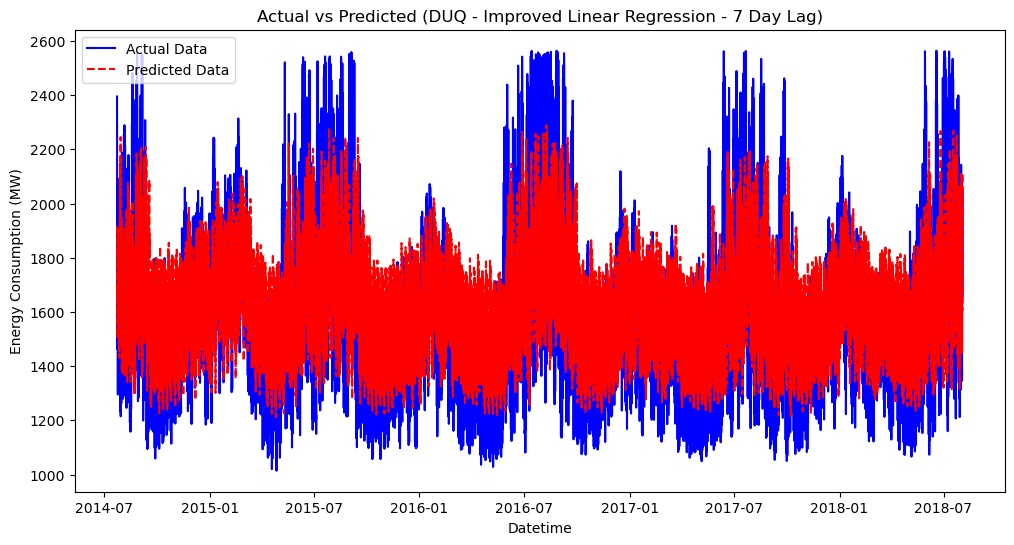

RMSE: 269.5335148545299


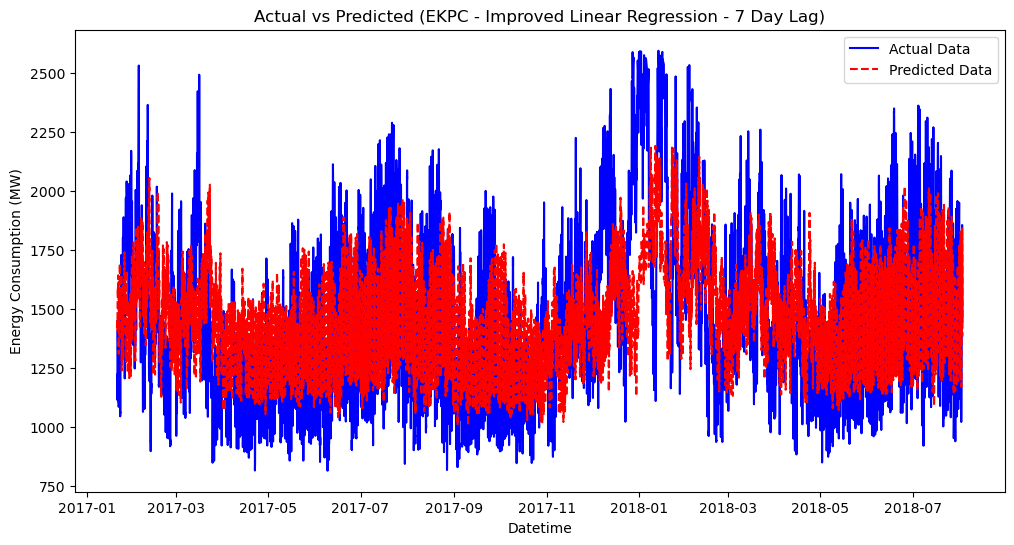

RMSE: 1002.6995993575767


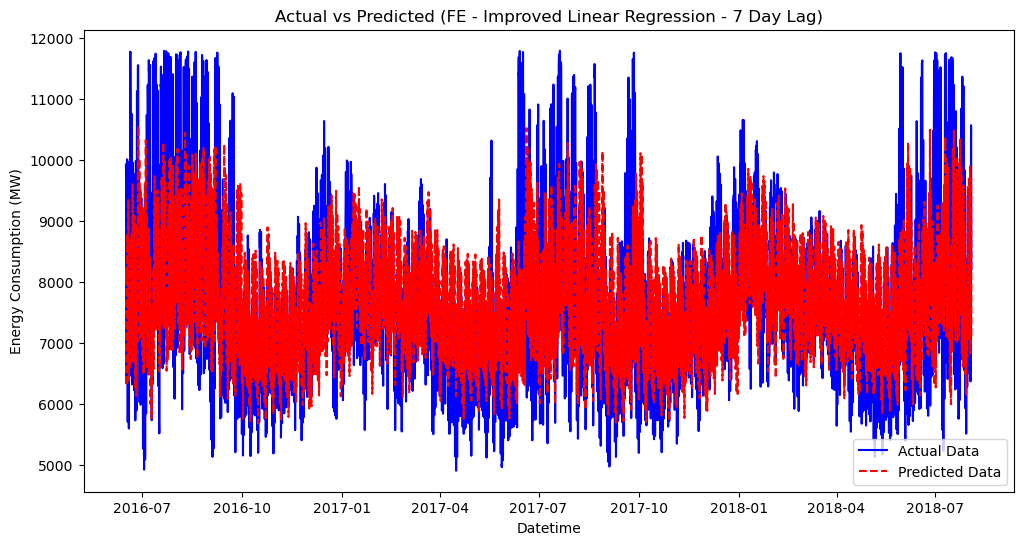

RMSE: 1446.1761609530565


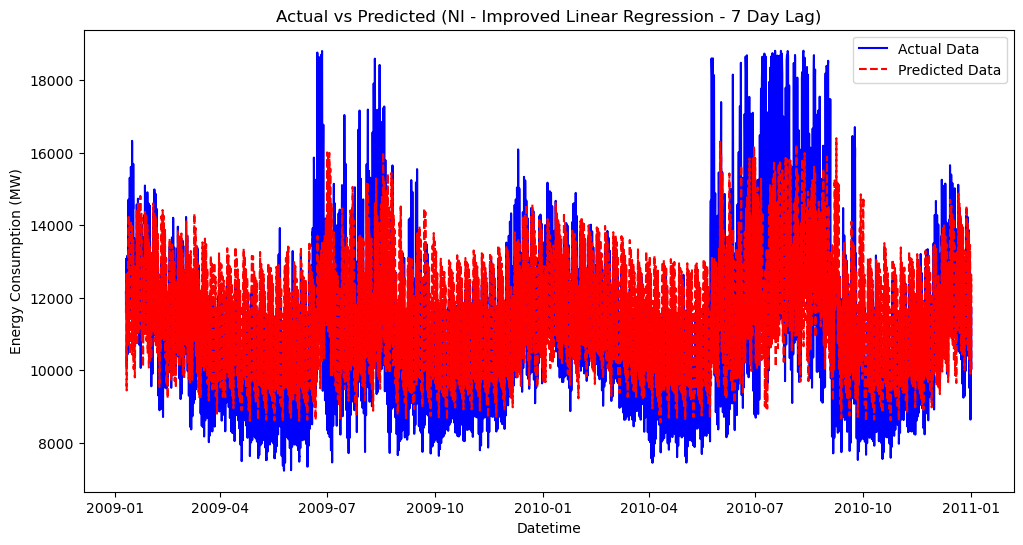

RMSE: 698.0803468843841


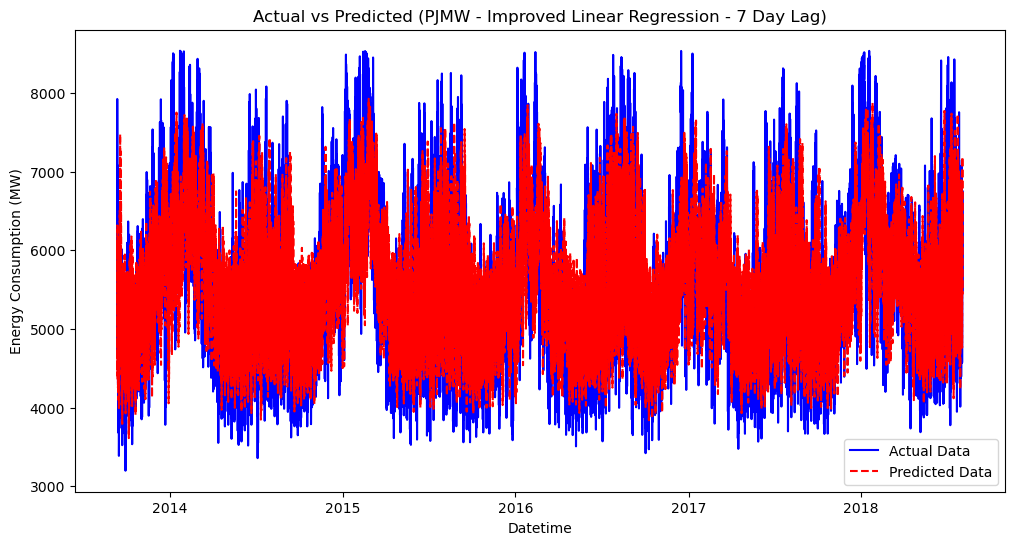

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Add lag features and cyclical encoding
for utility, df in processed_data.items():
    target = f'{utility}_MW'
    df['lag_day'] = df[target].shift(168)


    # Drop rows with NaN due to lag/rolling features
    df = df.dropna()

    # New feature set
    features = ['hour', 'day_of_week', 'month', 'lag_week']
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=False)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Evaluate predictions
    y_pred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Data', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted ({utility} - Improved Linear Regression - 7 Day Lag)')
    plt.xlabel('Datetime')
    plt.ylabel('Energy Consumption (MW)')
    plt.legend()
    plt.show()

RMSE: 1034.411113325413


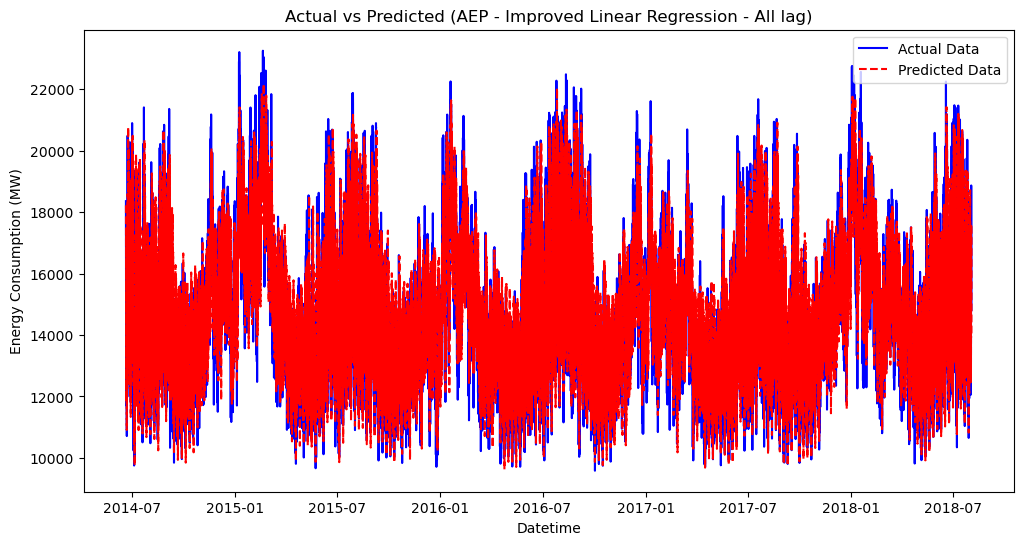

RMSE: 1151.1989971027424


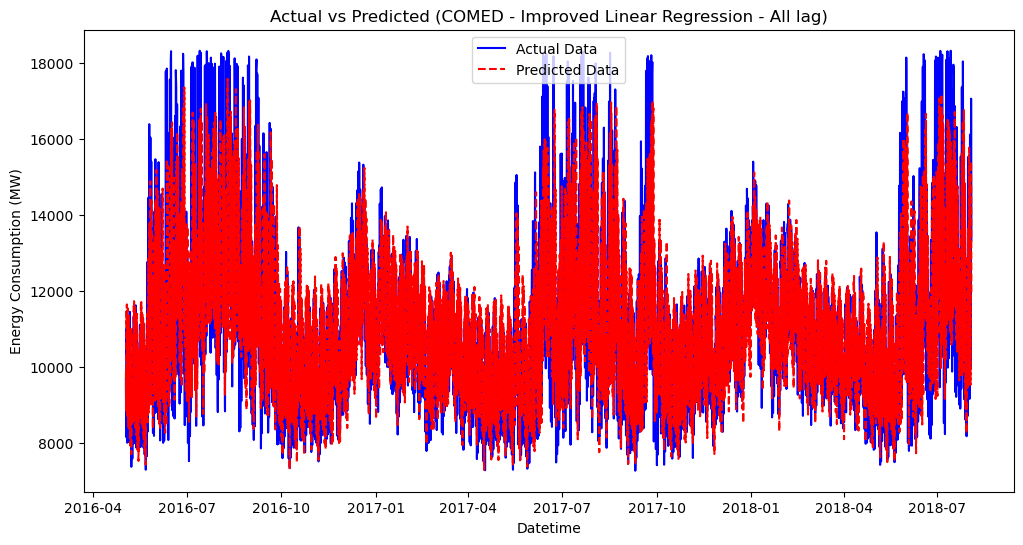

RMSE: 172.7156713617271


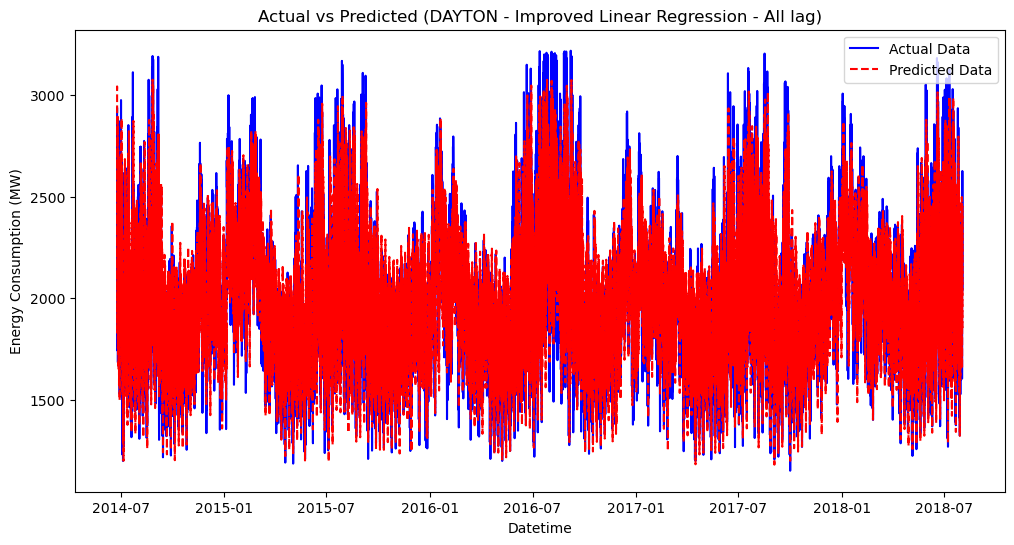

RMSE: 277.5214230398373


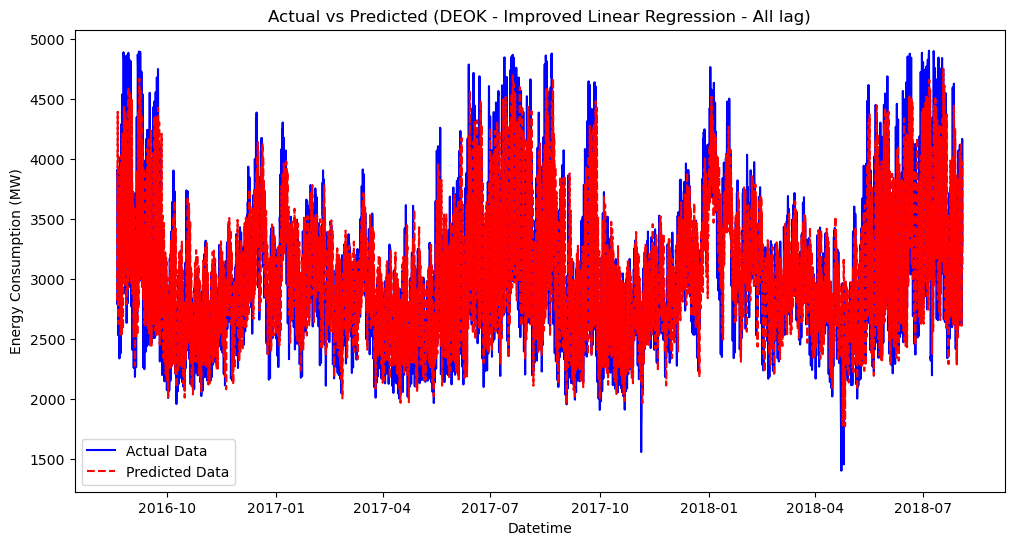

RMSE: 1158.2691094836173


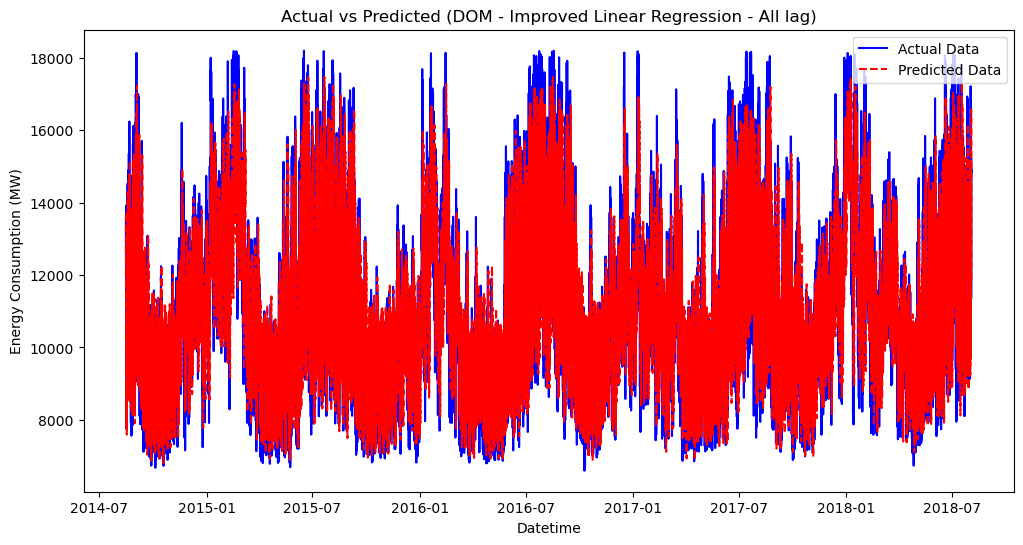

RMSE: 135.5494717999716


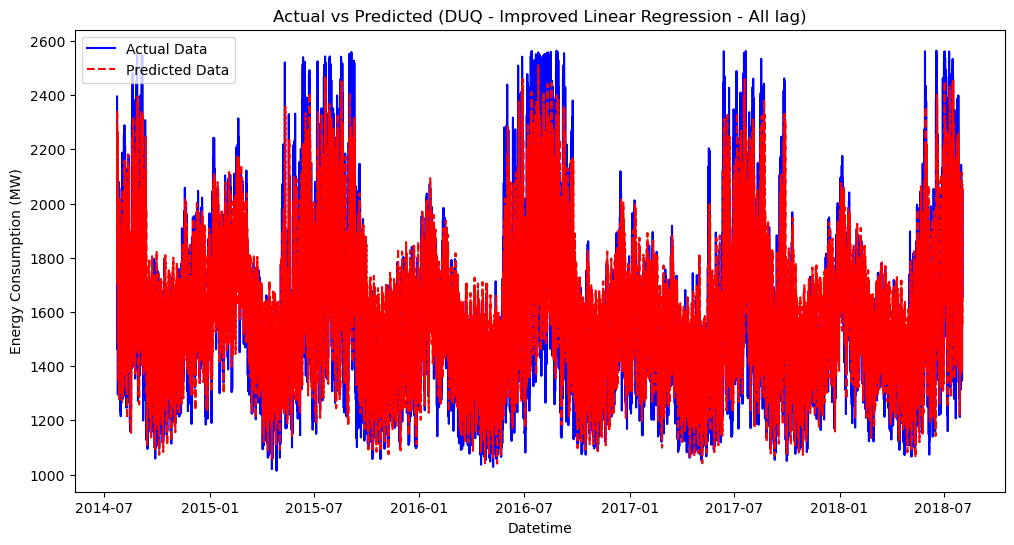

RMSE: 183.0355745122928


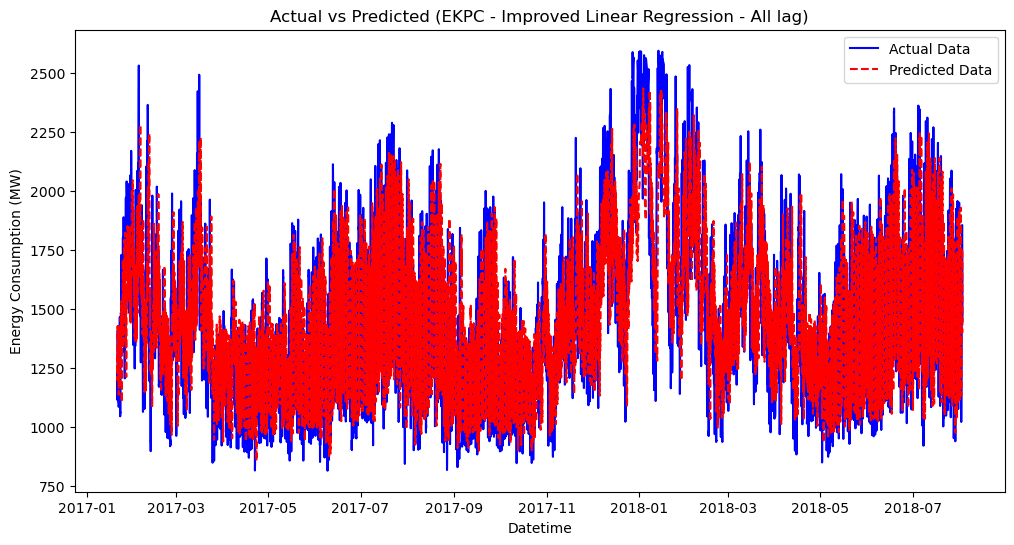

RMSE: 663.5980494462963


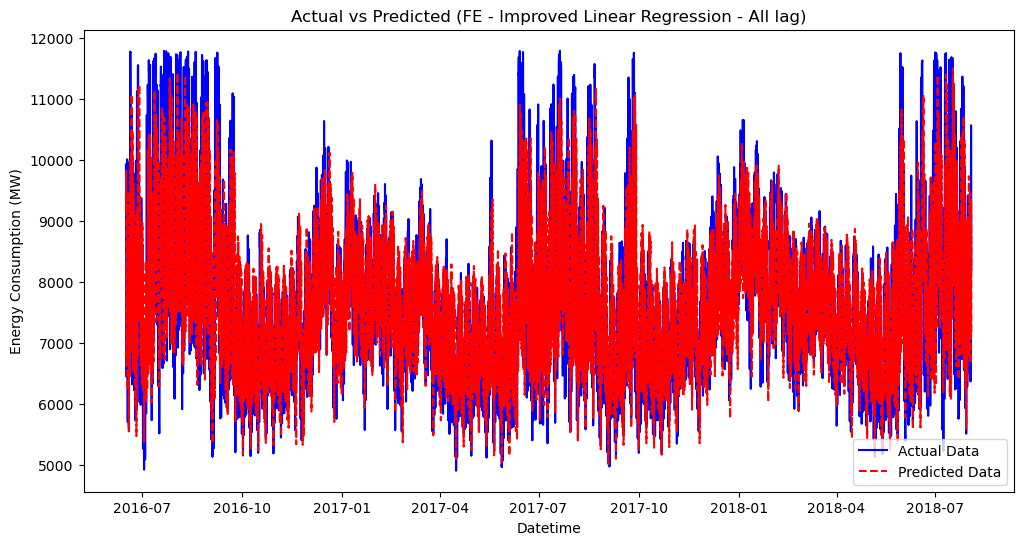

RMSE: 1023.7097929752555


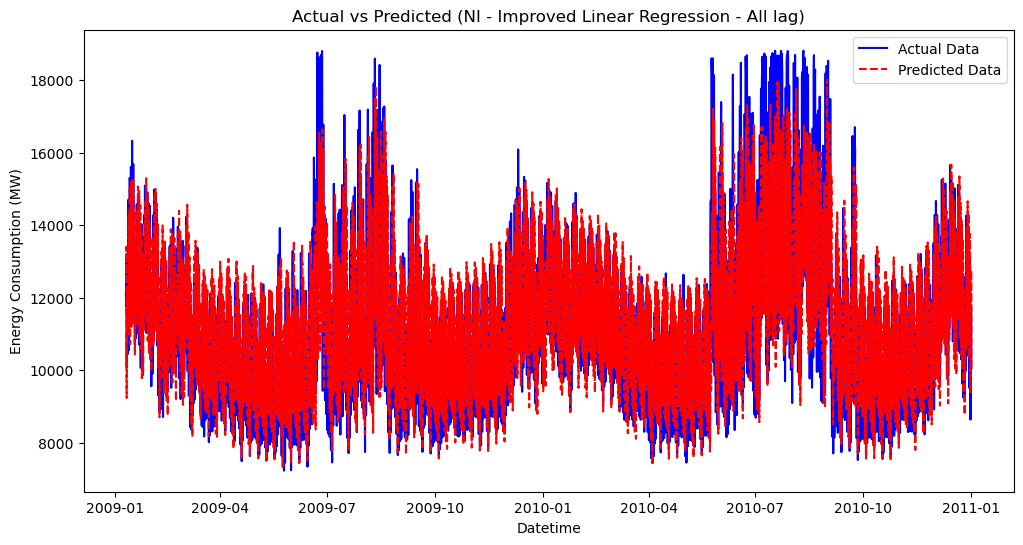

RMSE: 436.72509590366695


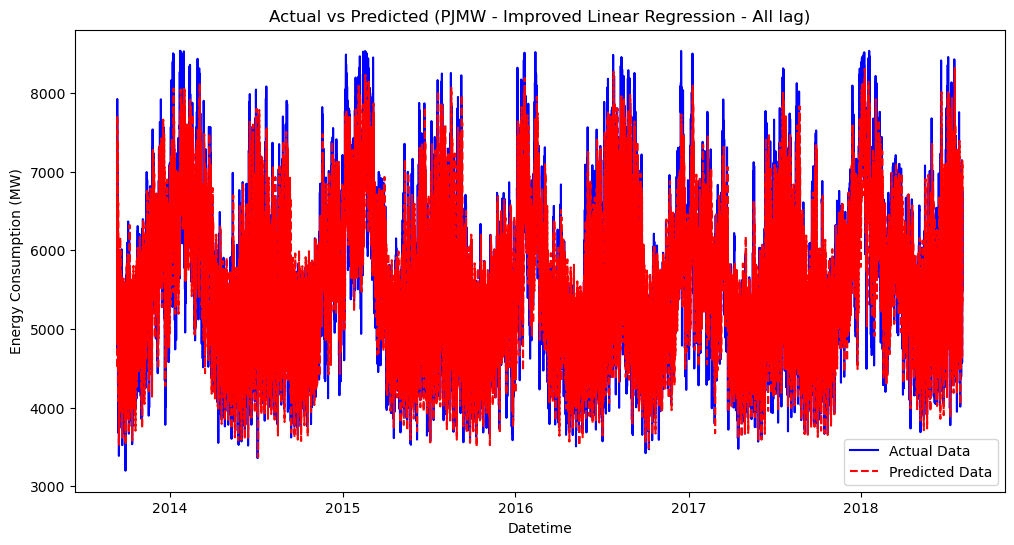

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Add lag features and cyclical encoding
for utility, df in processed_data.items():
    target = f'{utility}_MW'
    df['lag_week'] = df[target].shift(168)
    df['lag_month'] = df[target].shift(720)
    df['lag_day'] = df[target].shift(24)


    # Drop rows with NaN due to lag/rolling features
    df = df.dropna()

    # New feature set
    features = ['hour', 'day_of_week', 'month', 'lag_week','lag_day','lag_month']
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=False)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Evaluate predictions
    y_pred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Data', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted ({utility} - Improved Linear Regression - All lag)')
    plt.xlabel('Datetime')
    plt.ylabel('Energy Consumption (MW)')
    plt.legend()
    plt.show()

RMSE: 1700.4389540819752


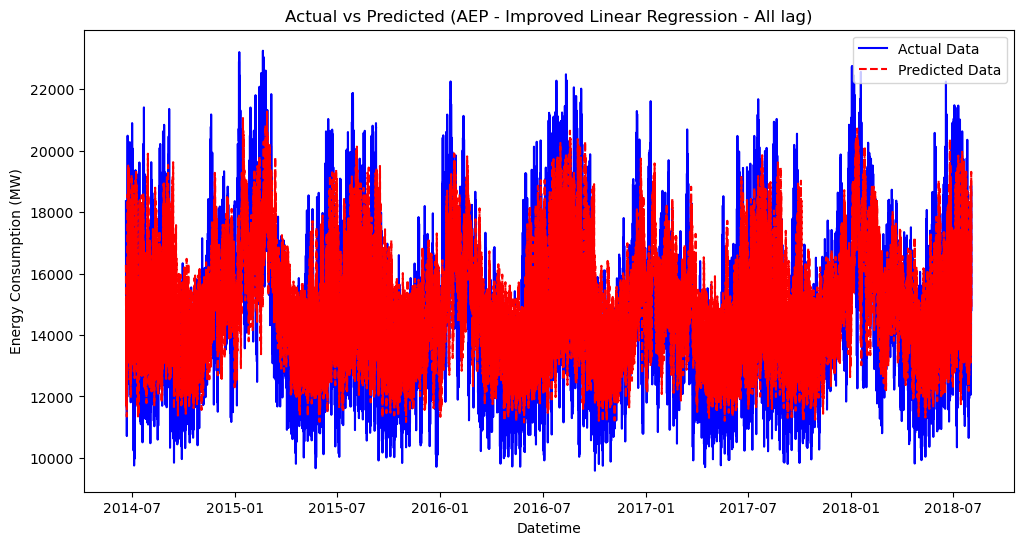

RMSE: 1700.659746766855


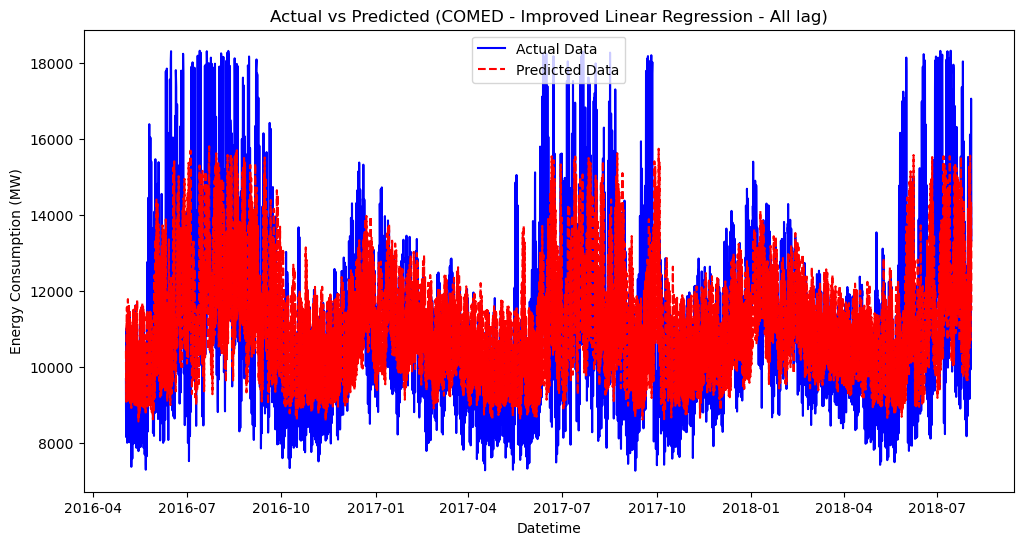

RMSE: 262.3842779917503


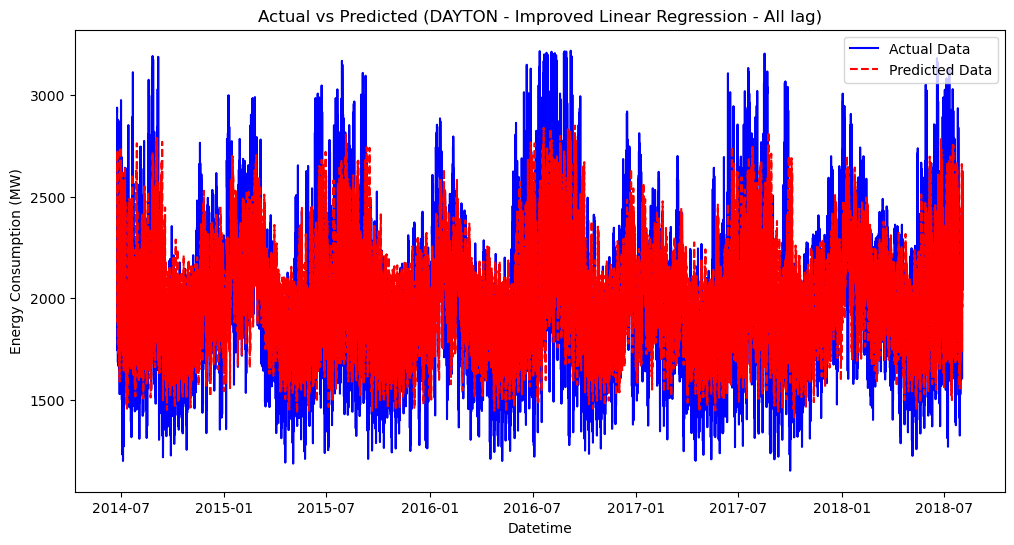

RMSE: 447.74045209762585


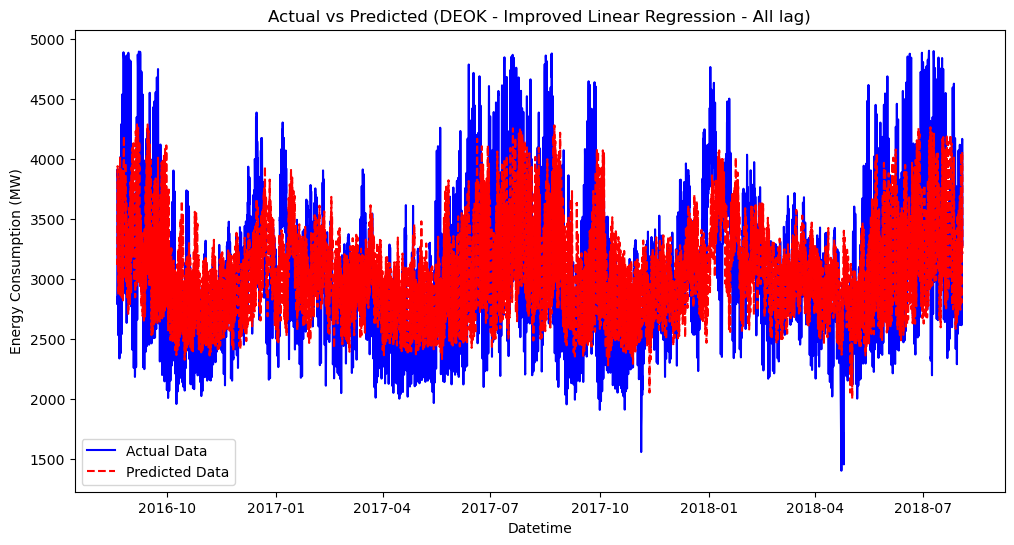

RMSE: 1829.1447195242688


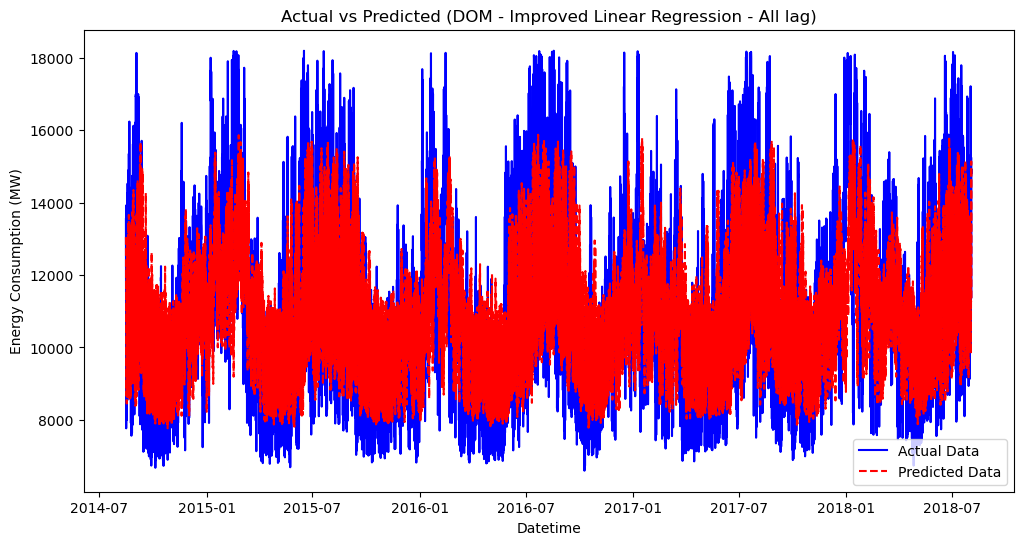

RMSE: 216.865122442792


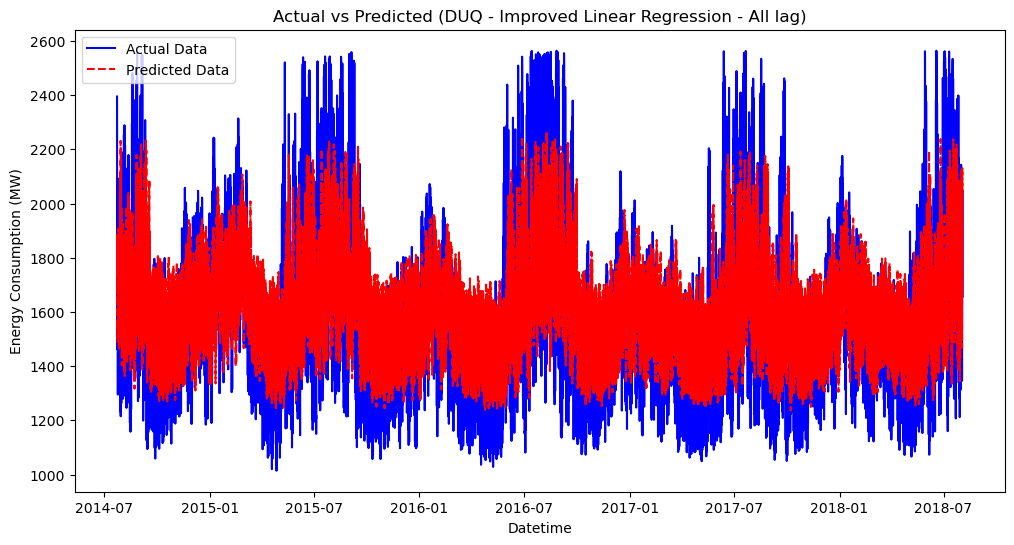

RMSE: 265.1055492432994


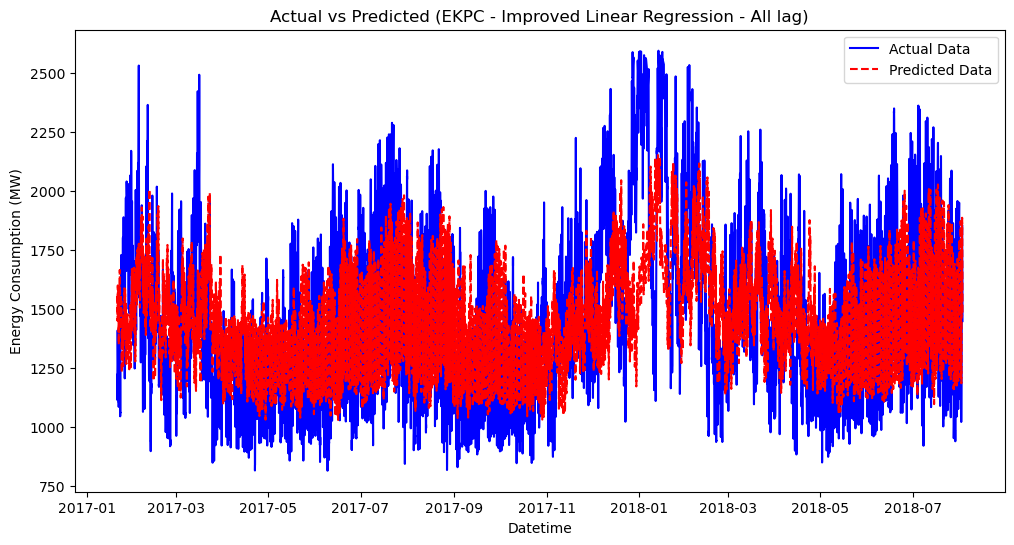

RMSE: 1027.9364841764666


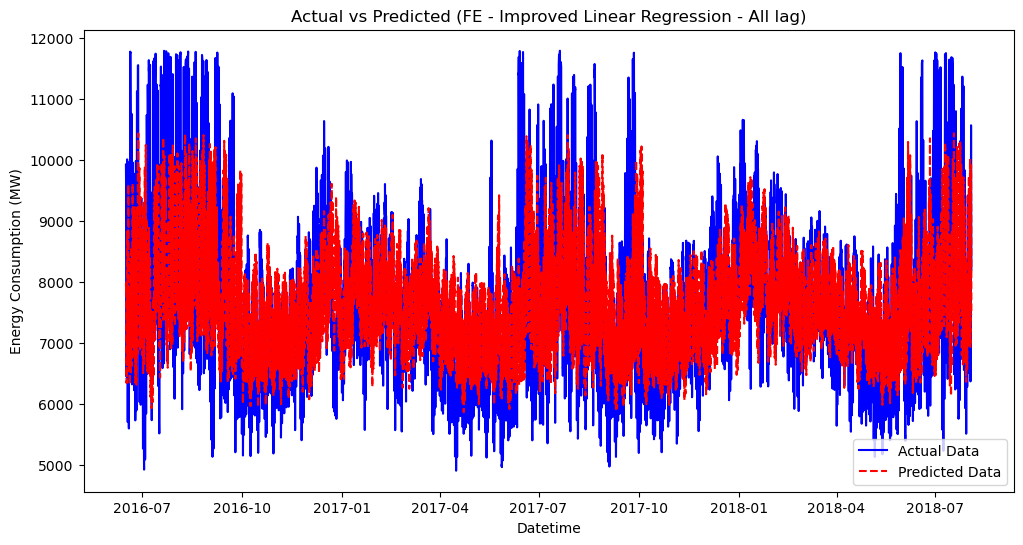

RMSE: 1444.486601510066


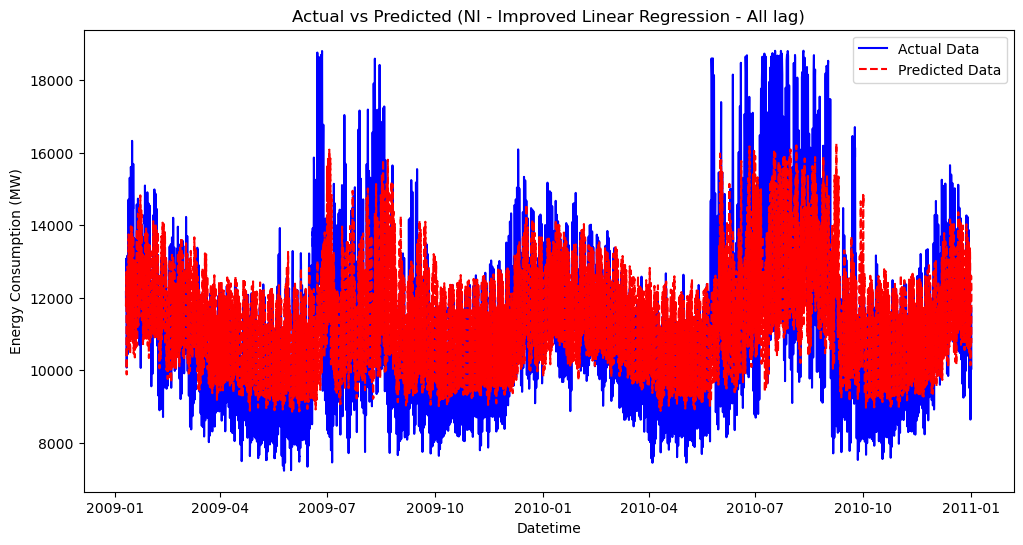

RMSE: 697.4018646493635


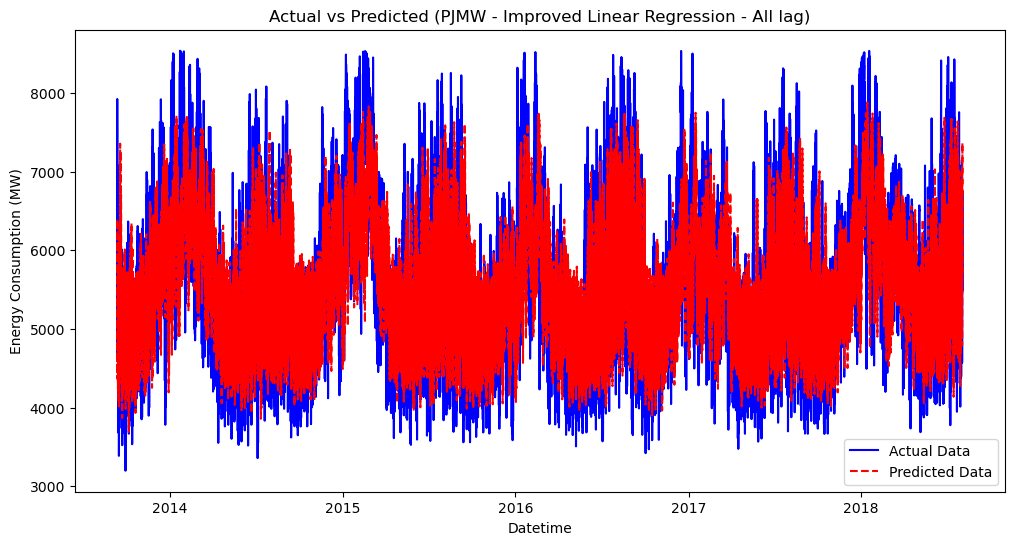

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Add lag features and cyclical encoding
for utility, df in processed_data.items():
    target = f'{utility}_MW'
    df['lag_week'] = df[target].shift(168)
    df['lag_month'] = df[target].shift(720)
    df['lag_day'] = df[target].shift(24)


    # Drop rows with NaN due to lag/rolling features
    df = df.dropna()

    # New feature set
    features = ['hour', 'day_of_week', 'month', 'lag_month', 'lag_week']
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=False)

    # Train the model
    ridge = Ridge(alpha=1000000)
    ridge.fit(X_train, y_train)

    # Evaluate predictions
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Data', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted ({utility} - Improved Linear Regression - Experimental)')
    plt.xlabel('Datetime')
    plt.ylabel('Energy Consumption (MW)')
    plt.legend()
    plt.show()